In [1]:
from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds

import numpy as onp

In [2]:
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05 #0.05

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"

from dds.targets.toy_targets import get_attr
### SET TASK
task = "moons"
div = 10
c = 100000

# div, e, other_dim = get_attr()
# div = str(div).replace(".", "")
# e = str(e).replace(".", "")
#
# save_name = f"{task}_s{div}_plus{e}_od{other_dim}"


funnel_config = set_task(funnel_config, task, div, c)
funnel_config.model.reference_process_key = "oudstl"
funnel_config.model.reference_process_key = "pisstl"
funnel_config.model.step_scheme_key = "uniform"
funnel_config.model.step_scheme_key = "cos_sq"
# funnel_config.model.reference_process_key = "pisstl"
# funnel_config.model.step_scheme_key = "uniform"

# exp_dec
# cos_sq
# uniform
# last_small
# linear_dds
# linear
# uniform_dds

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    
    # Opt setting for funnel
    funnel_config.model.sigma = 1.075
    funnel_config.model.alpha = 0.6875
    funnel_config.model.m = 1.0
        
    # Path opt settings    
    funnel_config.model.exp_dds = False


funnel_config.model.stl = False
funnel_config.model.detach_stl_drift = False

# funnel_config.model.stl = True
# funnel_config.model.detach_stl_drift = True

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 50
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 1 * 10**(-3)
funnel_config.trainer.lr_sch_base_dec = 0.90 # For funnel

In [3]:
funnel_config.trainer.epochs = 300
tl_lists = []
vl_lists = []
ta_lists = []
va_lists = []
out_dicts1 = []
task = "moons"
for div in [1, 0.5, 0.2]:
    funnel_config = set_task(funnel_config, task, div, c)
    funnel_config.model.input_dim = 41
    out_dict = train_dds(funnel_config)
    out_dicts1.append(out_dict)
    tl_lists.append([x.item() for x in out_dict[-1]["training_loss"]])
    vl_lists.append([x.item() for x in out_dict[-1]["validation_loss"]])
    ta_lists.append([x.item() for x in out_dict[-1]["training_acc"]])
    va_lists.append([x.item() for x in out_dict[-1]["validation_acc"]])

Best training loss: 0.36466097831726074
Best validation loss: 0.3691064715385437
1000
1000
Best training accuracy: 0.9917999505996704
Best validation accuracy: 0.9927999973297119
Best training accuracy (AVG): 0.986359977722168
Best validation accuracy (AVG): 0.9836399674415588
WITH VAL
Test Accuracy: 0.9943999648094177
Test Accuracy (AVG): 0.5067999958992004
WITH TRAIN
Test Accuracy: 0.9943999648094177
Test Accuracy (AVG): 0.5324000120162964
('epoch: %s %s  loss: %s', 0, 'TRAIN', -59874.14453125)
('epoch: %s %s  loss: %s', 1, 'TRAIN', -75537.1796875)
Best training loss: 0.09073355793952942
Best validation loss: 0.09390810132026672
1000
1000
Best training accuracy: 0.9989999532699585
Best validation accuracy: 0.9991999864578247
Best training accuracy (AVG): 0.9987599551677704
Best validation accuracy (AVG): 0.9989199817180634
WITH VAL
Test Accuracy: 0.995199978351593
Test Accuracy (AVG): 0.5095999836921692
WITH TRAIN
Test Accuracy: 0.996399998664856
Test Accuracy (AVG): 0.50679999589920

In [4]:
print(va_lists)

[[0.7787999510765076, 0.9799999594688416, 0.9991999864578247, 0.9995999932289124, 0.9983999729156494, 0.995199978351593, 0.9827999472618103, 0.9979999661445618, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995999932289124, 0.9995999932289124, 0.9995999932289124, 0.9995999932289124, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 1.0, 0.9995999932289124, 1.0, 0.9995999932289124, 1.0, 1.0, 0.9995999932289124], [0.7731999754905701, 0.9843999743461609, 0.9983999729156494, 0.9987999796867371, 0.9987999796867371, 0.9932000041007996, 0.9959999918937683, 0.9947999715805054, 0.9987999796867371, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 0.9995999932289124, 1.0, 1.0, 1.0, 1.0, 1.

0.028908027336001396
0.08991163969039917
0.008468189276754856
0.03270363807678223
0.100403626759847
0.010502716526389122
0.037483961010972656
0.13161824891964594
0.012082301390667757
0.08189446826775869
0.19252646068731943
0.02665517311543226
0.11441903623441856
0.2267576900621255
0.0377355118903021


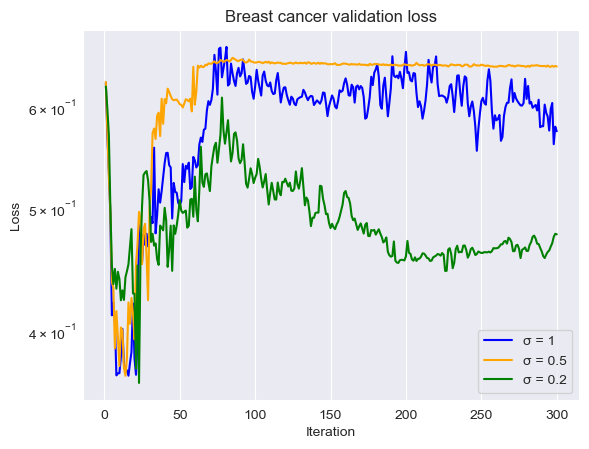

In [8]:
import matplotlib.pyplot as plt

# Combine the lists
labels = ["σ = 1", "σ = 0.5", "σ = 0.2"]#, "10", "15", "20"]
colors = ["blue", "orange", "green"]#, "red", "purple", "yellow"]

# Plot the data
xax = range(1,301,1)
for i, (acc, label, color) in enumerate(zip(val_lists1, labels, colors)):
    plt.plot(xax,acc, label=label, color=color)

# Add a horizontal line at y = -1
plt.axhline(y=-0, color="black", linestyle="--")

# Add labels and legend
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Breast cancer validation loss")
plt.legend()

SNOOP = [1, 3, 6, 30, 60]
for idx in SNOOP:
    for i in (acc_lists1):
        k = i
        k = sorted(k)
        print(sum(k[:idx])/idx)

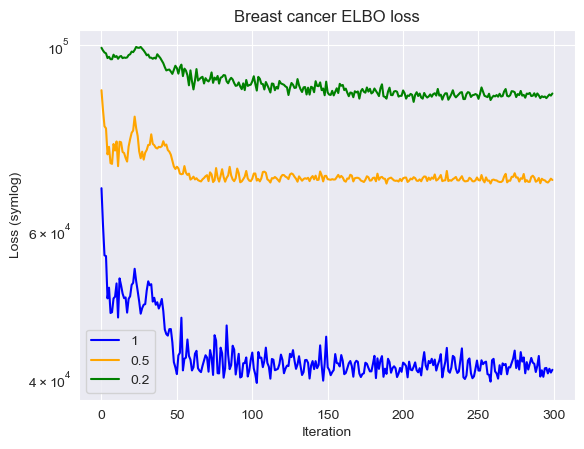

In [6]:
import matplotlib.pyplot as plt
import numpy as np
# Combine the lists
labels = ["1", "0.5", "0.2"]#, "10", "15", "20"]
colors = ["blue", "orange", "green"]#, "red", "purple", "yellow"]
d_list = [np.array(out_dicts1[0][-1]["elbo"])+100000, np.array(out_dicts1[1][-1]["elbo"])+100000, np.array(out_dicts1[2][-1]["elbo"])+100000]
# Plot the data
for i, (acc, label, color) in enumerate(zip(d_list, labels, colors)):
    plt.plot(acc, label=label, color=color)

# Add a horizontal line at y = -1
plt.axhline(y=-0, color="black", linestyle="--")

# Add labels and legend
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Loss (symlog)")
plt.title("Breast cancer ELBO loss")
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

# Combine the lists
labels = ["4", "6", "8", "10", "15", "20"]
colors = ["blue", "orange", "green", "red", "purple", "yellow"]

# Plot the data
for i, (acc, label, color) in enumerate(zip(acc_lists1, labels, colors)):
    plt.plot(acc, label=label, color=color)

# Add a horizontal line at y = -1
plt.axhline(y=-0, color="black", linestyle="--")

# Add labels and legend
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss for different dimensions, σ = 100")
plt.legend()

# Show the plot
plt.show()

In [ ]:
div = 1000
funnel_config.trainer.epochs = 300
acc_lists2 = []
out_dicts2 = []
for div in [1, 0.5, 0.2]:
    funnel_config = set_task(funnel_config, task, div, c)
    funnel_config.model.input_dim = 9
    out_dict = train_dds(funnel_config)
    out_dicts2.append(out_dict)
    acc_lists2.append([x.item() for x in out_dict[-1]["training_loss"]])

In [ ]:
import matplotlib.pyplot as plt

# Combine the lists
labels = ["4", "6", "8", "10", "15", "20"]
colors = ["blue", "orange", "green", "red", "purple", "yellow"]

# Plot the data
for i, (acc, label, color) in enumerate(zip(acc_lists2, labels, colors)):
    plt.plot(acc, label=label, color=color)

# Add a horizontal line at y = -1
plt.axhline(y=-0, color="black", linestyle="--")

# Add labels and legend
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss for different dimensions, σ = 1000")
plt.legend()

# Show the plot
plt.show()

In [ ]:
from utility_func import *
import visualisation
plot_training_loss(out_dict[-1]["elbo"])
print(out_dict[-1]["elbo"][-1])
visualisation.heat_2d(out_dict)

In [ ]:
out_dict[-1].keys()

In [ ]:
onp.mean(out_dict[-1]["is_eval"])

In [ ]:
onp.mean(out_dict[-1]["pf_eval"])

In [ ]:
out_dict[-1]["pf_eval"]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

loss_list1, loss_list2, loss_list3 = [], [], []

for i in acc_lists:
    #loss_list1.append(np.log(min(i)))
    loss_list1.append(min(i))

for i in acc_lists1:
    #loss_list2.append(np.log(min(i)))
    loss_list2.append(min(i))

for i in acc_lists2:
    #loss_list3.append(np.log(min(i)))
    loss_list3.append(min(i))

# Combine the lists
loss_lists = [loss_list1, loss_list2, loss_list3]
labels = ['σ = 10', 'σ = 100', 'σ = 1000']
colors = ['blue', 'orange', 'green']

# Custom x-axis labels
x_labels = ["4", "6", "8", "10", "15", "20"]

# Plot the data
for i, (loss, label, color) in enumerate(zip(loss_lists, labels, colors)):
    plt.plot(x_labels, loss, label=label, color=color, marker="o")

# Add labels and legend
plt.yscale('log')
plt.xlabel("X-axis Label")
plt.ylabel("Loss")
plt.title("Loss vs. X-axis Label")
plt.legend()

# Show the plot
plt.show()

In [ ]:
funnel_config.model.reference_process_key

In [ ]:
print(out_dict[-1]["aug"].shape)

In [ ]:
import matplotlib.pyplot as plt

#ode_targ = out_dict[-1]["aug_ode"][:, -1,:2]
sde_targ = out_dict[-1]["aug"][:, -1,:2]

#plt.plot(ode_targ[:, 0], abs(ode_targ[:, 1]), ".", alpha=0.4)
plt.plot(sde_targ[:, 0])#, sde_targ[:, 1], ".", alpha=0.4)
#print(onp.mean(sde_targ[:, 0]))

In [ ]:
import numpy as np
data_x = []
data_fx = []
for sample in out_dict[-1]["aug"]:
    x = sample[-1][:input_dim-1]
    fx = abs(sample[-1][input_dim-1])
    data_x.append(x)
    data_fx.append(fx)

m = np.argmax(data_fx)
print(f"weights: {data_x[m]}")


# Create a list of tuples containing x, y, and z values
combined_data = zip(data_x, data_fx)

# Sort the combined data based on the z values in descending order
sorted_data = sorted(combined_data, key=lambda t: t[1], reverse=True)

# Unzip the sorted data back into separate x, y, and z lists
data_x_sorted, data_fx_sorted = zip(*sorted_data)

best = np.array(list(zip(data_x_sorted, data_fx_sorted)))[:100]
# avg = np.mean(best, axis=0)
# v, w = avg
# print(np.sin(3*np.pi*v) + (v - 1)**2 * (1+np.sin(3*np.pi*w)**2) + (w-1)**2 * (1 + np.sin(2*np.pi*w)**2))
# print(avg)
#print(best)
# for v,w in best:
#     v = np.sin(3*np.pi*v) + (v - 1)**2 * (1+np.sin(3*np.pi*w)**2) + (w-1)**2 * (1 + np.sin(2*np.pi*w)**2)
#     print(v)
from experimental.xor_t import xor_task
task = xor_task()
b = 1
w = None
print(len(data_x))
for weights in data_x:
#for weights, _ in best:
    l = task.get_loss(weights)
    #print(l)
    if l < b:
        b = l
        w = weights

print(b, w)



In [ ]:
from visualisation import *

heat_2d(out_dict, save_name=save_name, sde=True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = []
for sample in out_dict[-1]["aug"]:
    s = sample[-1]
    data.append(s)

# Compute the histogram values
hist, bin_edges = np.histogram(data, bins=100)

# Compute the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create a line plot using Seaborn
sns.lineplot(x=bin_centers, y=hist)

# Set the x and y axis labels
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='x=0.3', alpha=0.5)

# Show the plot
plt.show()

In [ ]:
from dds.targets.toy_targets import *

car = carillo_target_class()
x_values = np.linspace(-10, 10, 1000)

# Compute the corresponding y values
# using the provided function
y_values = np.exp(-car.f(x_values) / 10)

#y_values = -norm.logpdf(y_values,loc=0., scale=1.)

# Create the plot
plt.plot(x_values, y_values)
plt.xlabel("v")
plt.ylabel("f(v)")
plt.title("Plot of the function f(v)")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dds.targets.toy_targets import *


def temp(x):
    tc = levy_target_class(0,0)
    k = np.exp(-tc.f(x)/10) * 1000
    return k

def rosenbrock_function(x):
    return np.exp(-((1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2)/0.01)

def rastrigin_function(x, A=10):
    n = len(x)
    return np.exp(-(A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x)))/1)

# Create a grid of points for the plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the Rosenbrock function for each point in the grid
Z = np.array([temp(np.array([x, y])) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# Create a contour plot
plt.figure()
plt.contourf(X, Y, Z, levels=100, cmap='jet')
plt.colorbar()
plt.title('Rosenbrock Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
import numpy as np
import jax.numpy as jnp
from jax.scipy.special import logsumexp
import matplotlib.pyplot as plt

def euclidean_distance_einsum(x, y):
    """Efficiently calculates the euclidean distance between vectors in two mats.


    Args:
      x: first matrix (nxd)
      y: second matrix (mxd)

    Returns:
      pairwise distance matrix (nxm)
    """
    xx = jnp.einsum('ij,ij->i', x, x)[:, jnp.newaxis]
    yy = jnp.einsum('ij,ij->i', y, y)
    xy = 2 * jnp.dot(x, y.T)
    out = xx + yy - xy

    return out

def log_p_pure(x):
    """Gaussian mixture density on well like structure.

    Args:
      x: vectors over which to evaluate the density

    Returns:
      nx1 vector containing density evaluations
    """

    mu = 1.0
    sigma2_ = 0.05
    mus_full = np.array([
        [- mu, 0.0],
        [- mu, mu],
        [- mu, -mu],
        [- mu, 2 * mu],
        [- mu, - 2 * mu],
        [mu, 0.0],
        [mu, mu],
        [mu, -mu],
        [mu, 2 * mu],
        [mu, - 2 * mu],
    ])
    dist_to_means = euclidean_distance_einsum(x, mus_full)

    out = logsumexp(-dist_to_means / (0.01 * sigma2_), axis=1)

    return out

#print(log_p_pure(jnp.array([1,2]).reshape(1,2)))

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the Rosenbrock function for each point in the grid
Z = np.array([log_p_pure(np.array([x, y]).reshape(1,2)) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# Create a contour plot
plt.figure()
plt.contourf(X, Y, Z, levels=100, cmap='jet')
plt.colorbar()
plt.title('Rosenbrock Function')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()